In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2
NUM_LANDMARKS = 42

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION * NUM_LANDMARKS) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION * NUM_LANDMARKS, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION, NUM_LANDMARKS), input_shape=(TIME_STEPS * DIMENSION * NUM_LANDMARKS, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION, NUM_LANDMARKS]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION * NUM_LANDMARKS, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 1344)              0         
                                                                 
 dense (Dense)               (None, 24)                32280     
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 32,574
Trainable params: 32,574
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1.3402 - accuracy: 0.2857
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 1s 876ms/step - loss: 1.3402 - accuracy: 0.2857 - val_loss: 1.1861 - val_accuracy: 0.6667
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 1.2796 - accuracy: 0.2857
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.2796 - accuracy: 0.2857 - val_loss: 0.9869 - val_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 1.2809 - accuracy: 0.4286
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 52ms/step - loss: 1.2809 - accuracy: 0.4286 - val_loss: 0.8744 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 0.9138 

1/1 [==============================] - 0s 52ms/step - loss: 0.6117 - accuracy: 0.8571 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 28/1000
1/1 [==============================] - ETA: 0s - loss: 0.0886 - accuracy: 1.0000
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 53ms/step - loss: 0.0886 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 0.1073 - accuracy: 1.0000
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.1073 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 1.0000
Epoch 30: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 53ms/step - loss: 0.0871 - a

1/1 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 1.0000
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 8.8947e-04 - val_accuracy: 1.0000
Epoch 55/1000
1/1 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 1.0000
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 8.1163e-04 - val_accuracy: 1.0000
Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 3.2505e-04 - accuracy: 1.0000
Epoch 56: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 52ms/step - loss: 3.2505e-04 - accuracy: 1.0000 - val_loss: 7.4624e-04 - val_accuracy: 1.0000
Epoch 57/1000
1/1 [==============================] - ETA: 0s - l

1/1 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.8626e-04 - val_accuracy: 1.0000
Epoch 81/1000
1/1 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 1.0000
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.7931e-04 - val_accuracy: 1.0000
Epoch 82/1000
1/1 [==============================] - ETA: 0s - loss: 0.2153 - accuracy: 0.8571
Epoch 82: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.2153 - accuracy: 0.8571 - val_loss: 1.7156e-04 - val_accuracy: 1.0000
Epoch 83/1000
1/1 [==============================] - ETA: 0s - loss: 2.3

Epoch 106/1000
1/1 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 1.0000
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 7.7720e-05 - val_accuracy: 1.0000
Epoch 107/1000
1/1 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 1.0000
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.0984 - accuracy: 1.0000 - val_loss: 7.1602e-05 - val_accuracy: 1.0000
Epoch 108/1000
1/1 [==============================] - ETA: 0s - loss: 2.4093e-04 - accuracy: 1.0000
Epoch 108: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 2.4093e-04 - accuracy: 1.0000 - val_loss: 6.6476e-05 - val_accuracy: 1.0000
Epoch 109/1000
1/1 [========================

Epoch 132/1000
1/1 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.5763e-06 - val_accuracy: 1.0000
Epoch 133/1000
1/1 [==============================] - ETA: 0s - loss: 0.1164 - accuracy: 1.0000
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 0.1164 - accuracy: 1.0000 - val_loss: 3.4173e-06 - val_accuracy: 1.0000
Epoch 134/1000
1/1 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 134: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.2584e-06 - val_accuracy: 1.0000
Epoch 135/1000
1/1 [==============================] 

Epoch 158/1000
1/1 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 2.2252e-06 - val_accuracy: 1.0000
Epoch 159/1000
1/1 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 1.0000
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.1062 - accuracy: 1.0000 - val_loss: 2.0266e-06 - val_accuracy: 1.0000
Epoch 160/1000
1/1 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000
Epoch 160: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 53ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.8676e-06 - val_accuracy: 1.0000
Epoch 161/1000
1/1 [==============================] 

Epoch 184/1000
1/1 [==============================] - ETA: 0s - loss: 2.7842e-04 - accuracy: 1.0000
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 2.7842e-04 - accuracy: 1.0000 - val_loss: 5.1657e-07 - val_accuracy: 1.0000
Epoch 185/1000
1/1 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 5.1657e-07 - val_accuracy: 1.0000
Epoch 186/1000
1/1 [==============================] - ETA: 0s - loss: 3.1214e-05 - accuracy: 1.0000
Epoch 186: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 3.1214e-05 - accuracy: 1.0000 - val_loss: 5.1657e-07 - val_accuracy: 1.0000
Epoch 187/1000
1/1 [================

Epoch 210/1000
1/1 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 1.0000
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.0743 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 211/1000
1/1 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 212/1000
1/1 [==============================] - ETA: 0s - loss: 3.1412e-04 - accuracy: 1.0000
Epoch 212: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 3.1412e-04 - accuracy: 1.0000 - val_loss: 2.3842e-07 - val_accuracy: 1.0000
Epoch 213/1000
1/1 [========================

Epoch 236/1000
1/1 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 52ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 237/1000
1/1 [==============================] - ETA: 0s - loss: 1.1307e-05 - accuracy: 1.0000
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 1.1307e-05 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 238/1000
1/1 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 1.0000
Epoch 238: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.0730 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 239/1000
1/1 [========================

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 87ms/step
[1.5498602e-09 9.9999988e-01 2.0471591e-12 8.3308556e-08]
1


# 混同行列

1/1 [==============================] - 0s 18ms/step


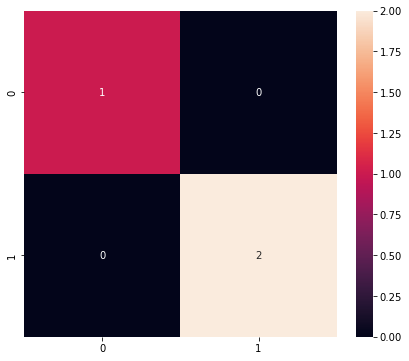

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmp7ke0oycd\assets


35648

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([   1, 1344]), 'shape_signature': array([  -1, 1344]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 999 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5511791e-09 9.9999988e-01 2.0533180e-12 8.3660773e-08]
1
